<a href="https://colab.research.google.com/github/ChandanaChevuturi/AI-ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('/content/mental_health_data.csv')
x_train = data['Sleep Hours'].values
y_train = data['Mental Health Score'].values

In [ ]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [5.87270059 8.75357153 7.65996971 6.99329242 4.7800932 ]


In [ ]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [10.         10.         10.         10.          9.34051452]


In [ ]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (100,)
The shape of y_train is:  (100,)
Number of training examples (m): 100


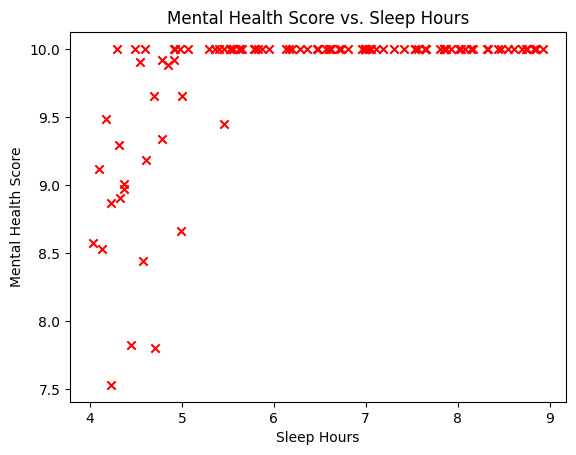

In [ ]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Mental Health Score vs. Sleep Hours")
# Set the y-axis label
plt.ylabel('Mental Health Score')
# Set the x-axis label
plt.xlabel('Sleep Hours')
plt.show()

In [ ]:
# Cost Function
import numpy as np

def compute_cost(x, y, w, b):
    # number of training examples
    m = x.shape[0]
    total_cost = 0
    f=w*x+b
    cost=(f-y)**2
    total_cost=(1 / (2 * m)) * np.sum(cost)

    return total_cost

In [ ]:
# compute_gradient
def compute_gradient(x, y, w, b):

    # Number of training examples
    m = x.shape[0]

    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0

    f=w*x+b
    error = f - y
    dj_dw = (1 / m) * np.dot(error, x)
    dj_db = (1 / m) * np.sum(error)


    return dj_dw, dj_db

In [ ]:

import copy
import math
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    # number of training examples
    m = len(x)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: health score {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

In [ ]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: health score    16.61   
Iteration  150: health score     1.64   
Iteration  300: health score     1.42   
Iteration  450: health score     1.23   
Iteration  600: health score     1.07   
Iteration  750: health score     0.94   
Iteration  900: health score     0.82   
Iteration 1050: health score     0.72   
Iteration 1200: health score     0.63   
Iteration 1350: health score     0.55   
w,b found by gradient descent: 0.7774663503818087 4.644190488289035


In [ ]:
m = x_train.shape[0]
predicted = np.zeros(m)

predicted = w * x_train + b

Text(0.5, 0, 'Sleep Hours')

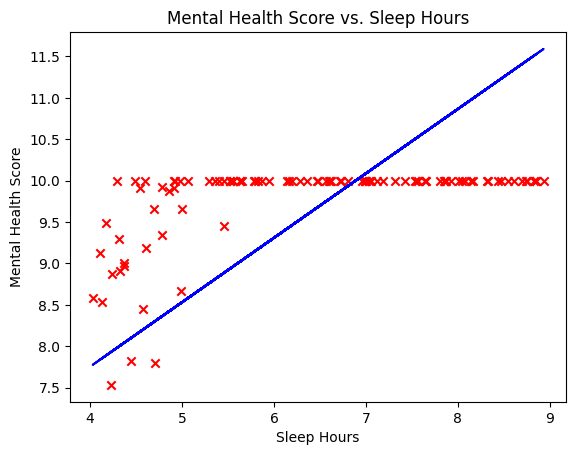

In [ ]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Mental Health Score vs. Sleep Hours")
# Set the y-axis label
plt.ylabel('Mental Health Score')
# Set the x-axis label
plt.xlabel('Sleep Hours')

In [ ]:
predict1 =  3.5 * w + b

predict2 = 7.0 * w + b
print(f"Predicted Mental Health Score for 4.2 hours of sleep: {predict1}")
print(f"Predicted Mental Health Score for 6.8 hours of sleep: {predict2}")


Predicted Mental Health Score for 4.2 hours of sleep: 7.365322714625366
Predicted Mental Health Score for 6.8 hours of sleep: 10.086454940961696


**Multiple Linear Regression**



Shape of x_train: (6, 3)
Shape of y_train: (6,)


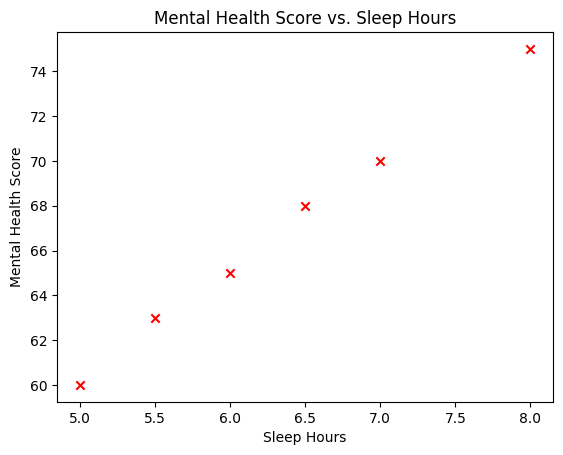

Iteration    0: Cost   678.97
Iteration  150: Cost    13.85
Iteration  300: Cost    12.17
Iteration  450: Cost    10.76
Iteration  600: Cost     9.58
Iteration  750: Cost     8.59
Iteration  900: Cost     7.74
Iteration 1050: Cost     7.03
Iteration 1200: Cost     6.41
Iteration 1350: Cost     5.89
Theta found by gradient descent: [11.20787084  9.97239036 -4.45062119]


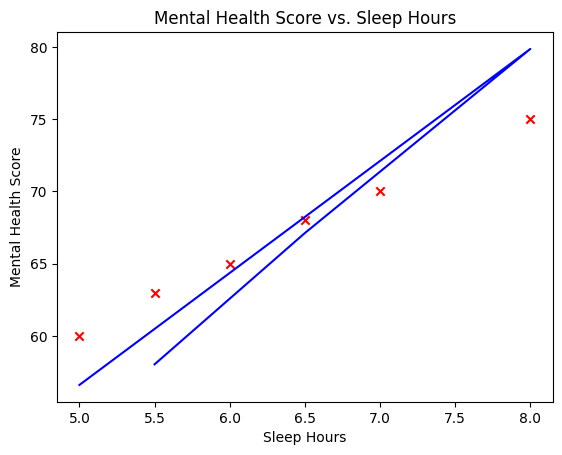

Predicted Mental Health Score for 4.2 hours of sleep and 2.0 hours of physical activity: 44.19066797347649


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

# Manually created dataset
data_dict = {
    'Sleep Hours': [5.0, 6.0, 7.0, 8.0, 6.5, 5.5],
    'Physical Activity Hours': [1.0, 1.5, 2.0, 2.5, 2.0, 1.8],
    'Mental Health Score': [60, 65, 70, 75, 68, 63]
}

# Create a DataFrame
data = pd.DataFrame(data_dict)

# Features and target variable
x_train = data[['Sleep Hours', 'Physical Activity Hours']].values
y_train = data['Mental Health Score'].values

# Add intercept term (bias) to X by inserting a column of ones
x_train = np.c_[np.ones(x_train.shape[0]), x_train]  # Adding column of ones for bias

# Check data shapes
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

# Scatter plot for visualization (if you have more than one feature, plot differently)
plt.scatter(x_train[:, 1], y_train, marker='x', c='r')  # Use first feature for plotting
plt.title("Mental Health Score vs. Sleep Hours")
plt.ylabel('Mental Health Score')
plt.xlabel('Sleep Hours')
plt.show()

# Cost Function (Mean Squared Error for Multiple Linear Regression)
def compute_cost(x, y, theta):
    m = x.shape[0]
    predictions = np.dot(x, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient Descent Function for Multiple Linear Regression
def compute_gradient(x, y, theta):
    m = x.shape[0]
    predictions = np.dot(x, theta)
    error = predictions - y
    dj_dw = (1 / m) * np.dot(x.T, error)  # Compute the gradient for all features
    return dj_dw

# Gradient Descent Optimization
def gradient_descent(x, y, theta_in, cost_function, gradient_function, alpha, num_iters):
    m = len(y)
    J_history = []  # History of cost to plot later
    theta = copy.deepcopy(theta_in)  # Avoid modifying the global theta
    for i in range(num_iters):
        dj_dw = gradient_function(x, y, theta)
        theta = theta - alpha * dj_dw  # Update the parameters

        # Record cost for each iteration
        if i < 100000:  # Avoid memory overload
            cost = cost_function(x, y, theta)
            J_history.append(cost)

        # Print cost every 10% iterations
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:8.2f}")

    return theta, J_history

# Initialize fitting parameters (including bias term)
initial_theta = np.zeros(x_train.shape[1])  # (n+1,) since we have n features + bias

# Gradient descent settings
iterations = 1500
alpha = 0.01

# Perform Gradient Descent
theta, J_history = gradient_descent(x_train, y_train, initial_theta, compute_cost, compute_gradient, alpha, iterations)
print("Theta found by gradient descent:", theta)

# Make predictions
predictions = np.dot(x_train, theta)

# Plot the linear fit (for visualization)
plt.scatter(x_train[:, 1], y_train, marker='x', c='r')  # Use first feature for plotting
plt.plot(x_train[:, 1], predictions, c="b")  # Linear fit
plt.title("Mental Health Score vs. Sleep Hours")
plt.ylabel('Mental Health Score')
plt.xlabel('Sleep Hours')
plt.show()

# Predicting for new values (e.g., 4.2 hours of sleep and 2.0 hours of physical activity)
new_data = np.array([1, 4.2, 2.0])  # [bias, Sleep Hours, Physical Activity Hours]
predicted_score = np.dot(new_data, theta)
print(f"Predicted Mental Health Score for 4.2 hours of sleep and 2.0 hours of physical activity: {predicted_score}")
